## Lab1

### Загрузка данных

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df = df.drop(columns =['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
print(df)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

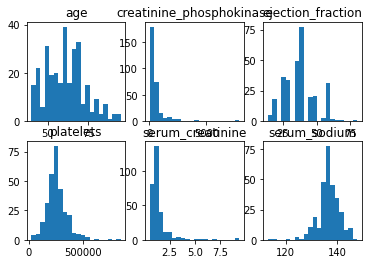

In [30]:
import matplotlib.pyplot as plt

n_bins = 20
fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(df['age'].values, bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(df['ejection_fraction'].values, bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(df['platelets'].values, bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(df['serum_creatinine'].values, bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(df['serum_sodium'].values, bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

In [31]:
names = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]

In [32]:
for name in names:
    print("diapason for {}: ({} : {})".format(name, df[name].min(), df[name].max()))

diapason for age: (40.0 : 95.0)
diapason for creatinine_phosphokinase: (23 : 7861)
diapason for ejection_fraction: (14 : 80)
diapason for platelets: (25100.0 : 850000.0)
diapason for serum_creatinine: (0.5 : 9.4)
diapason for serum_sodium: (113 : 148)


In [33]:
for name in names:
    print("most frequent value for {}: {}".format(name, df[name].value_counts().idxmax()))

most frequent value for age: 60.0
most frequent value for creatinine_phosphokinase: 582
most frequent value for ejection_fraction: 35
most frequent value for platelets: 263358.03
most frequent value for serum_creatinine: 1.0
most frequent value for serum_sodium: 136


In [34]:
data = df.to_numpy(dtype='float')

### Стандартизация данных

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[:150,:])

In [36]:
data_scaled = scaler.transform(data)

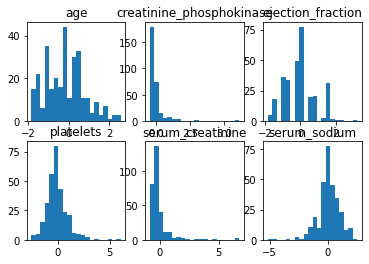

In [37]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(data_scaled[:,0], bins=n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:,1], bins=n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:,2], bins=n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:,3], bins=n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:,4], bins=n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:,5], bins=n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()


Стандартизация приводит все исходные значения набора данных,
независимо от их начальных распределений и единиц измерения,
к набору значений из распределения с нулевым средним и
стандартным отклонением, равным 1. В результате формируется
так называемая стандартизированная шкала, которая определяет
место каждого значения в наборе данных, измеряя его
отклонение от среднего в единицах стандартного отклонения.

In [38]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("МО before стандарт.: {}".format(np.mean(data[:,i])))
    print("СКО before стандарт.: {}".format(np.std(data[:,i])))
    print("МО after стандарт.: {}".format(np.mean(data_scaled[:,i])))
    print("СКО after стандарт.: {}".format(np.std(data_scaled[:,i])))
    print()

For age:
МО before стандарт.: 60.83389297658862
СКО before стандарт.: 11.874901429842655
МО after стандарт.: -0.16970362369106984
СКО after стандарт.: 0.9538237876978354

For creatinine_phosphokinase:
МО before стандарт.: 581.8394648829432
СКО before стандарт.: 968.6639668032415
МО after стандарт.: -0.021276750290383013
СКО after стандарт.: 0.8141790488228113

For ejection_fraction:
МО before стандарт.: 38.08361204013378
СКО before стандарт.: 11.815033462318585
МО after стандарт.: 0.01050249484809085
СКО after стандарт.: 0.9061082161919123

For platelets:
МО before стандарт.: 263358.02926421404
СКО before стандарт.: 97640.54765451424
МО after стандарт.: -0.035228788194085287
СКО after стандарт.: 1.0150611342848024

For serum_creatinine:
МО before стандарт.: 1.3938795986622072
СКО before стандарт.: 1.0327786652795918
МО after стандарт.: -0.10864080163893569
СКО after стандарт.: 0.8854288727548568

For serum_sodium:
МО before стандарт.: 136.62541806020067
СКО before стандарт.: 4.40509237

In [39]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("MO: {}".format(scaler.mean_[i]))
    print("Дисп: {}".format(scaler.var_[i]))
    print()

For age:
MO: 62.946666666666665
Дисп: 154.99715555555557

For creatinine_phosphokinase:
MO: 607.1533333333333
Дисп: 1415488.8231555554

For ejection_fraction:
MO: 37.946666666666665
Дисп: 170.02382222222224

For platelets:
MO: 266746.74946666666
Дисп: 9252860499.078917

For serum_creatinine:
MO: 1.5206000000000002
Дисп: 1.3605269733333336

For serum_sodium:
MO: 136.45333333333335
Дисп: 20.607822222222225



In [40]:
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)

In [42]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("МО before стандарт.: {}".format(np.mean(data[:,i])))
    print("СКО before стандарт.: {}".format(np.std(data[:,i])))
    print("МО after стандарт.: {}".format(np.mean(data_scaled[:,i])))
    print("СКО after стандарт.: {}".format(np.std(data_scaled[:,i])))
    print()

For age:
МО before стандарт.: 60.83389297658862
СКО before стандарт.: 11.874901429842655
МО after стандарт.: 5.703353062957326e-16
СКО after стандарт.: 0.9999999999999998

For creatinine_phosphokinase:
МО before стандарт.: 581.8394648829432
СКО before стандарт.: 968.6639668032415
МО after стандарт.: 0.0
СКО after стандарт.: 1.0

For ejection_fraction:
МО before стандарт.: 38.08361204013378
СКО before стандарт.: 11.815033462318585
МО after стандарт.: -3.267546025652635e-17
СКО after стандарт.: 1.0

For platelets:
МО before стандарт.: 263358.02926421404
СКО before стандарт.: 97640.54765451424
МО after стандарт.: 7.723290606088045e-17
СКО after стандарт.: 1.0

For serum_creatinine:
МО before стандарт.: 1.3938795986622072
СКО before стандарт.: 1.0327786652795918
МО after стандарт.: 1.4258382657393315e-16
СКО after стандарт.: 1.0

For serum_sodium:
МО before стандарт.: 136.62541806020067
СКО before стандарт.: 4.405092379513557
МО after стандарт.: -8.673849449914267e-16
СКО after стандарт.: 

In [43]:
for i in range(6):
    print("For {}:".format(names[i]))
    print("MO: {}".format(scaler.mean_[i]))
    print("Дисп: {}".format(scaler.var_[i]))
    print()

For age:
MO: 60.83389297658862
Дисп: 141.01328396847913

For creatinine_phosphokinase:
MO: 581.8394648829432
Дисп: 938309.8805829913

For ejection_fraction:
MO: 38.08361204013378
Дисп: 139.5950157157079

For platelets:
MO: 263358.02926421404
Дисп: 9533676546.273466

For serum_creatinine:
MO: 1.3938795986622072
Дисп: 1.066631771456695

For serum_sodium:
MO: 136.62541806020067
Дисп: 19.404838872048412

